Assignment 2: Least Square Fits for Modelling Population Growth

Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimization

Data

In [4]:
year_gapminder, pop_gapminder = np.loadtxt("/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Comp_Sim_Assignment_2/Data/population-gapminder.dat", skiprows=1, unpack=True)
year_census, pop_census = np.loadtxt("/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Comp_Sim_Assignment_2/Data/population-census-bureau.dat", skiprows=1, unpack=True)

Plotting and analysis

Plotting Logarithm of population as function of time

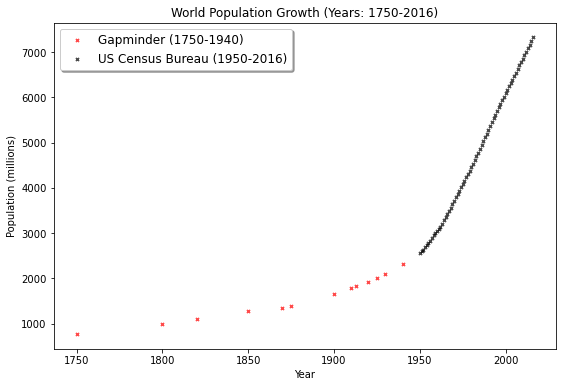

In [5]:
# =============population data sets plotted as a function of time================code done personally=========================
plt.figure(figsize=(9, 6))
plt.scatter(year_gapminder, pop_gapminder, marker='x', s=10, c='red', alpha=0.7, label='Gapminder (1750-1940)')
plt.scatter(year_census, pop_census, marker='x', s=10, c='black', alpha=0.7, label='US Census Bureau (1950-2016)')
plt.xlabel('Year')
plt.ylabel('Population (millions)')
plt.title('World Population Growth (Years: 1750-2016)')
plt.legend(fontsize=12, frameon=True, shadow=True, loc='upper left')


Imrpoved styling using Claude. Data points graphed remained untouched!

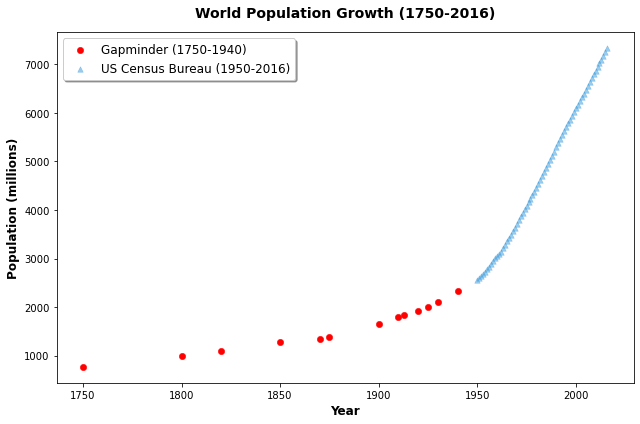

In [6]:
plt.figure(figsize=(9, 6))

# Improved scatter plots with better styling
plt.scatter(year_gapminder, pop_gapminder, marker='o', s=40, c='red',
            alpha=1, linewidth=0.5, label='Gapminder (1750-1940)')
plt.scatter(year_census, pop_census, marker='^', s=30, c='#3498DB',
            alpha=0.5, linewidth=0.5, label='US Census Bureau (1950-2016)')

# Improved labels and title
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Population (millions)', fontsize=12, fontweight='bold')
plt.title('World Population Growth (1750-2016)', fontsize=14, fontweight='bold', pad=15)

# Better legend
plt.legend(fontsize=12, frameon=True, shadow=True, loc='upper left')

# Improve tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Optional: Set axis limits for better framing
# plt.xlim(1740, 2020)
# plt.ylim(0, max(pop_census) * 1.1)



plt.tight_layout()

plt.savefig('/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Comp_Sim_Assignment_2/Plots/population_growth_scatter.pdf')

Plotting Logarithm of population as function of time

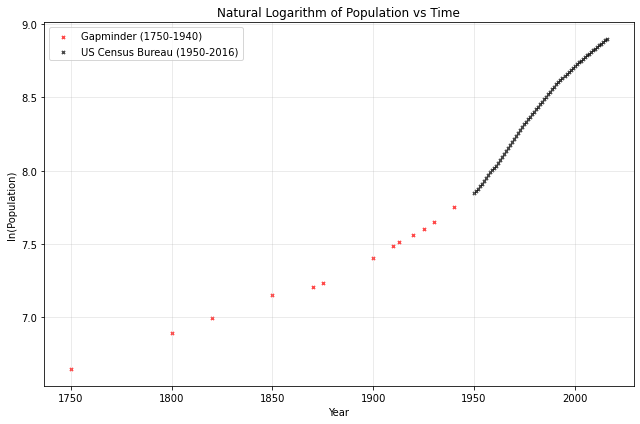

In [7]:
plt.figure(figsize=(9, 6))

ln_pop_gapminder = np.log(pop_gapminder)
ln_pop_census = np.log(pop_census)

plt.scatter(year_gapminder, ln_pop_gapminder, marker='x', s=10, c='red', alpha=0.7, label='Gapminder (1750-1940)')
plt.scatter(year_census, ln_pop_census, marker='x', s=10, c='black', alpha=0.7, label='US Census Bureau (1950-2016)')
plt.xlabel('Year')
plt.ylabel('ln(Population)')
plt.title('Natural Logarithm of Population vs Time')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('population_initial_plots.png', dpi=300)
plt.show()

Nicer version using Claude

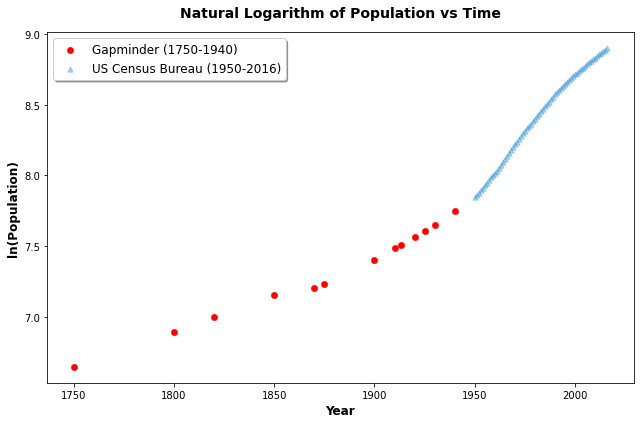

In [8]:
plt.figure(figsize=(9, 6))

# Improved scatter plots with better styling
plt.scatter(year_gapminder, ln_pop_gapminder, marker='o', s=40, c='red',
            alpha=1, linewidth=0.5, label='Gapminder (1750-1940)')
plt.scatter(year_census, ln_pop_census, marker='^', s=30, c='#3498DB',
            alpha=0.5, linewidth=0.5,  label='US Census Bureau (1950-2016)')

# Improved labels and title
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('ln(Population)', fontsize=12, fontweight='bold')
plt.title('Natural Logarithm of Population vs Time', fontsize=14, fontweight='bold', pad=15)

# Better legend
plt.legend(fontsize=12, frameon=True, shadow=True, loc='upper left')

# Improve tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)



plt.tight_layout()

plt.savefig('/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Comp_Sim_Assignment_2/Plots/log_population_growth_scatter.pdf')

Linear Regression

In [16]:
# ===========================
# Linear Regression Analysis
# ===========================

def linear_func(t, a, b):
    return a + b * t

#Time Range 1
range1_mask = (year_gapminder >= 1870) & (year_gapminder <= 1940) 
year_range1 = year_gapminder[range1_mask]
ln_pop_range1 = ln_pop_gapminder[range1_mask]

#Time Range 2
range2_mask = (year_census >= 1950) & (year_census <= 1990)
year_range2 = year_census[range2_mask]
ln_pop_range2 = ln_pop_census[range2_mask]

#Time Range 3
range3_mask = (year_census >= 1990) 
year_range3 = year_census[range3_mask]
ln_pop_range3 = ln_pop_census[range3_mask]

print("LINEAR REGRESSION")
print("=" * 50)

# Fit 1
fitparams1 = optimization.curve_fit(linear_func, year_range1, ln_pop_range1)[0]
a1 = fitparams1[0]
b1 = fitparams1[1]

print(f"\nFit 1 (Period: {year_range1[0]:.0f}-{year_range1[-1]:.0f})")
print(f"  Linear fit: ln(n) = a + b*t")
print(f"  a = {a1:.6f}")
print(f"  b = {b1:.6f}")

# Calculate lambda and n0 from fit parameters
# a = ln(n0) - lambda*t0, b = lambda
# Therefore: lambda = b, n0 = exp(a + lambda*t0)
t0_1 = year_range1[0]
lambda1 = b1
n0_1 = np.exp(a1 + lambda1 * t0_1)

print(f"\n  Exponential model: n(t) = n0 * exp(lambda * (t - t0))")
print(f"  t0 = {t0_1:.0f}")
print(f"  lambda = {lambda1:.6f} per year")
print(f"  n0 = {n0_1:.2f} million")

# Fit 2
fitparams2 = optimization.curve_fit(linear_func, year_range2, ln_pop_range2)[0]
a2 = fitparams2[0]
b2 = fitparams2[1]

print(f"\nFit 2 (Period: {year_range2[0]:.0f}-{year_range2[-1]:.0f})")
print(f"  Linear fit: ln(n) = a + b*t")
print(f"  a = {a2:.6f}")
print(f"  b = {b2:.6f}")

t0_2 = year_range2[0]
lambda2 = b2
n0_2 = np.exp(a2 + lambda2 * t0_2)

print(f"\n  Exponential model: n(t) = n0 * exp(lambda * (t - t0))")
print(f"  t0 = {t0_2:.0f}")
print(f"  lambda = {lambda2:.6f} per year")
print(f"  n0 = {n0_2:.2f} million")


# Fit 3- current day
fitparams3 = optimization.curve_fit(linear_func, year_range3, ln_pop_range3)[0]
a3 = fitparams3[0]
b3 = fitparams3[1]

print(f"\nFit 3 (Period: {year_range3[0]:.0f}-{year_range3[-1]:.0f})")
print(f"  Linear fit: ln(n) = a + b*t")
print(f"  a = {a3:.6f}")
print(f"  b = {b3:.6f}")

t0_3 = year_range3[0]
lambda3 = b3
n0_3 = np.exp(a3 + lambda3 * t0_3)

print(f"\n  Exponential model: n(t) = n0 * exp(lambda * (t - t0))")
print(f"  t0 = {t0_3:.0f}")
print(f"  lambda = {lambda3:.6f} per year")
print(f"  n0 = {n0_3:.2f} million")



LINEAR REGRESSION

Fit 1 (Period: 1870-1940)
  Linear fit: ln(n) = a + b*t
  a = -7.091612
  b = 0.007638

  Exponential model: n(t) = n0 * exp(lambda * (t - t0))
  t0 = 1870
  lambda = 0.007638 per year
  n0 = 1326.97 million

Fit 2 (Period: 1950-1990)
  Linear fit: ln(n) = a + b*t
  a = -28.429098
  b = 0.018600

  Exponential model: n(t) = n0 * exp(lambda * (t - t0))
  t0 = 1950
  lambda = 0.018600 per year
  n0 = 2542.04 million

Fit 3 (Period: 1990-2016)
  Linear fit: ln(n) = a + b*t
  a = -16.081882
  b = 0.012396

  Exponential model: n(t) = n0 * exp(lambda * (t - t0))
  t0 = 1990
  lambda = 0.012396 per year
  n0 = 5352.06 million


Final Plotting with fitted segments.

In [15]:
# Create exponential fit curves for plotting
year_fit1 = np.linspace(year_range1[0], year_range1[-1], 100)
pop_fit1 = n0_1 * np.exp(lambda1 * (year_fit1 - t0_1))

year_fit2 = np.linspace(year_range2[0], year_range2[-1], 100)
pop_fit2 = n0_2 * np.exp(lambda2 * (year_fit2 - t0_2))

year_fit3 = np.linspace(year_range3[0], year_range3[-1], 100)
pop_fit3 = n0_3 * np.exp(lambda3 * (year_fit3 - t0_3))

Graphing.

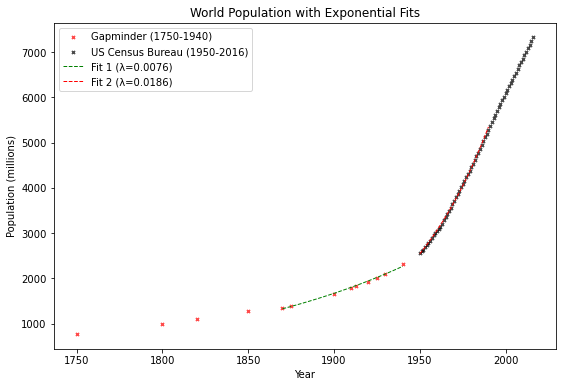

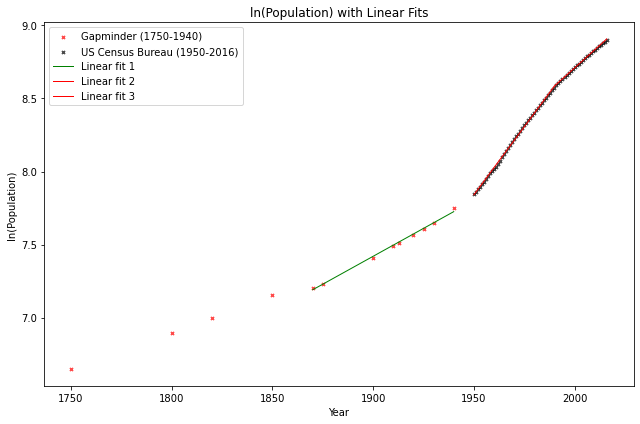

In [17]:
# Plot original data with exponential fits
plt.figure(figsize=(9, 6))
plt.scatter(year_gapminder, pop_gapminder, marker='x', s=10, c='red', alpha=0.7, label='Gapminder (1750-1940)')
plt.scatter(year_census, pop_census, marker='x', s=10, c='black', alpha=0.7, label='US Census Bureau (1950-2016)')
plt.plot(year_fit1, pop_fit1, '--',  c='green', linewidth=1, label=f'Fit 1 (λ={lambda1:.4f})')
plt.plot(year_fit2, pop_fit2, '--',  c='red', linewidth=1, label=f'Fit 2 (λ={lambda2:.4f})')
plt.xlabel('Year')
plt.ylabel('Population (millions)')
plt.title('World Population with Exponential Fits')
plt.legend()
plt.show()




# Plot ln(population) with linear fits
plt.figure(figsize=(9, 6))
plt.scatter(year_gapminder, ln_pop_gapminder, marker='x', s=10, c='red', alpha=0.7, label='Gapminder (1750-1940)')
plt.scatter(year_census, ln_pop_census, marker='x', s=10, c='black', alpha=0.7, label='US Census Bureau (1950-2016)')
plt.plot(year_range1, linear_func(year_range1, a1, b1), c='green', linewidth=1, label=f'Linear fit 1')
plt.plot(year_range2, linear_func(year_range2, a2, b2), c='red', linewidth=1, label=f'Linear fit 2')
plt.plot(year_range3, linear_func(year_range3, a3, b3), c='red', linewidth=1, label=f'Linear fit 3')
plt.xlabel('Year')
plt.ylabel('ln(Population)')
plt.title('ln(Population) with Linear Fits')
plt.legend()
plt.tight_layout()
plt.show()

Graphing, after improved styling with Claude

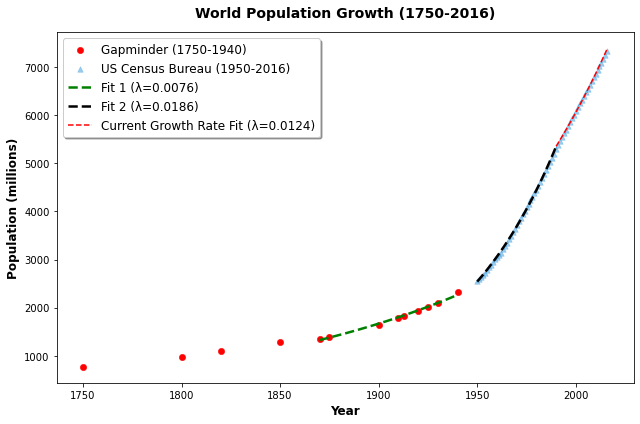

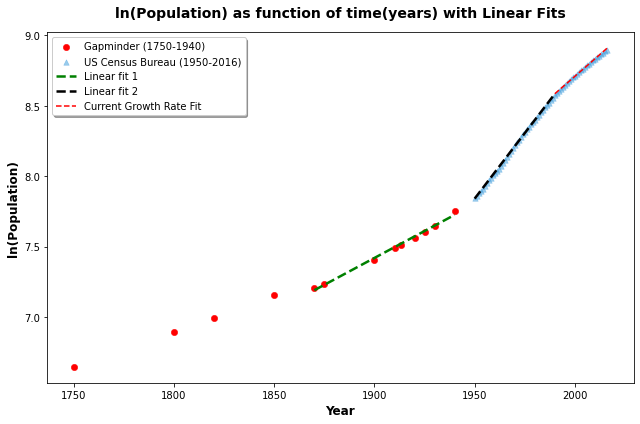

In [24]:
plt.figure(figsize=(9, 6))

# Improved scatter plots with better styling
plt.scatter(year_gapminder, pop_gapminder, marker='o', s=40, c='red',
            alpha=1, linewidth=0.5, label='Gapminder (1750-1940)')
plt.scatter(year_census, pop_census, marker='^', s=30, c='#3498DB',
            alpha=0.5, linewidth=0.5, label='US Census Bureau (1950-2016)')
# Exponential fit lines
plt.plot(year_fit1, pop_fit1, "--" , c='green', linewidth=2.5, label=f'Fit 1 (λ={lambda1:.4f})')
plt.plot(year_fit2, pop_fit2, "--", c='black', linewidth=2.5,  label=f'Fit 2 (λ={lambda2:.4f})')
plt.plot(year_fit3, pop_fit3, "--", c='red', linewidth=1.5, label=f'Current Growth Rate Fit (λ={lambda3:.4f})')

# Improved labels and title
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Population (millions)', fontsize=12, fontweight='bold')
plt.title('World Population Growth (1750-2016)', fontsize=14, fontweight='bold', pad=15)

# Better legend
plt.legend(fontsize=12, frameon=True, shadow=True, loc='upper left')

# Improve tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Optional: Set axis limits for better framing
# plt.xlim(1740, 2020)
# plt.ylim(0, max(pop_census) * 1.1)



plt.tight_layout()

plt.savefig('/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Comp_Sim_Assignment_2/Plots/lpopulation_with_exponential_fits.pdf', dpi=300)
plt.show()

# ===========================
# Plot 2: ln(population) with linear fits
# ===========================
plt.figure(figsize=(9, 6))

# Improved scatter plots with better styling
plt.scatter(year_gapminder, ln_pop_gapminder, marker='o', s=40, c='red',
            alpha=1, linewidth=0.5, label='Gapminder (1750-1940)')
plt.scatter(year_census, ln_pop_census, marker='^', s=30, c='#3498DB',
            alpha=0.5, linewidth=0.5, label='US Census Bureau (1950-2016)')

# Linear fit lines
plt.plot(year_range1, linear_func(year_range1, a1, b1), "--" , c='green', linewidth=2.5, label='Linear fit 1')
plt.plot(year_range2, linear_func(year_range2, a2, b2), "--", c='black', linewidth=2.5, label='Linear fit 2')
plt.plot(year_range3, linear_func(year_range3, a3, b3), "--", c='red', linewidth=1.5, label='Current Growth Rate Fit')

# Improved labels and title
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('ln(Population)', fontsize=12, fontweight='bold')
plt.title('ln(Population) as function of time(years) with Linear Fits', fontsize=14, fontweight='bold', pad=15)

# Better legend
plt.legend(fontsize=10, frameon=True, shadow=True, loc='upper left')



# Improve tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)



plt.tight_layout()
plt.savefig('/Users/mattthew/Documents/GitHub/Comp-Sim-Numerical-Methods/Comp_Sim_Assignment_2/Plots/lpopulation_with_linear_fits.pdf', dpi=300)
plt.show()

Conclusion

In [13]:
print("\nNote: Adjust the time ranges (range1_mask and range2_mask)")
print("based on visual inspection of the ln(population) plot to find")
print("periods where the data appears approximately linear.")
print("\nAI Usage\n========\nClaude was used in this script to enhance the visualizations of the plots, \nincluding color schemes, marker styles, and overall aesthetics. The data analysis \nand fitting procedures were performed independently.\nAs well as Graphing, it was used to initially set up the linear regresssion, which\nwas then personally taylored to the probem at hand.")



Note: Adjust the time ranges (range1_mask and range2_mask)
based on visual inspection of the ln(population) plot to find
periods where the data appears approximately linear.

AI Usage
Claude was used in this script to enhance the visualizations of the plots, 
including color schemes, marker styles, and overall aesthetics. The data analysis 
and fitting procedures were performed independently.
As well as Graphing, it was used to initially set up the linear regresssion, which
was then personally taylored to the probem at hand.
